In [1]:
import itertools
import os
import functools
import dataclasses
import packaging.version
import importlib
from typing import List, Sequence, Set, Iterator, Optional

import libmambapy
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

import mamba_error_reporting as mer

pd.set_option("max_colwidth", None)
pd.set_option("display.max_columns", None)

%matplotlib inline

## Previous error message

In [2]:
# Reload all mer modules (for dev purposes)
for m in mer.__all__:
    importlib.reload(getattr(mer, m))
    
solver, pool = mer.problems.create_pytorch_cuda()

success = solver.solve()
if not success:
    print(mer.messaging.old_error_report(solver))

Mamba failed to solve. The reported errors are:
   Encountered problems while solving:
     - package pytorch-1.11.0-cpu_py310h2272b30_0 requires python_abi 3.10.* *_cp310, but none of the providers can be installed
   


## Raw libsolv data

In [3]:
# Reload all mer modules (for dev purposes)
for m in mer.__all__:
    importlib.reload(getattr(mer, m))

pbs = mer.analysis.all_problems_structured_df(solver)
deps = mer.analysis.select_solvables_df(
    pool, pbs[~pbs.dependency.isnull()].dependency_id.drop_duplicates()
)
solvables = mer.analysis.id_to_pkg_info_df(pool,
    itertools.chain(
    pbs[pbs.source_is_pkg].source_id,
    pbs[pbs.target_is_pkg].target_id,
    deps.solvable_id
)).drop_duplicates().set_index('id').sort_index()

## Graph compression

==================================================== Original graph ====================================================


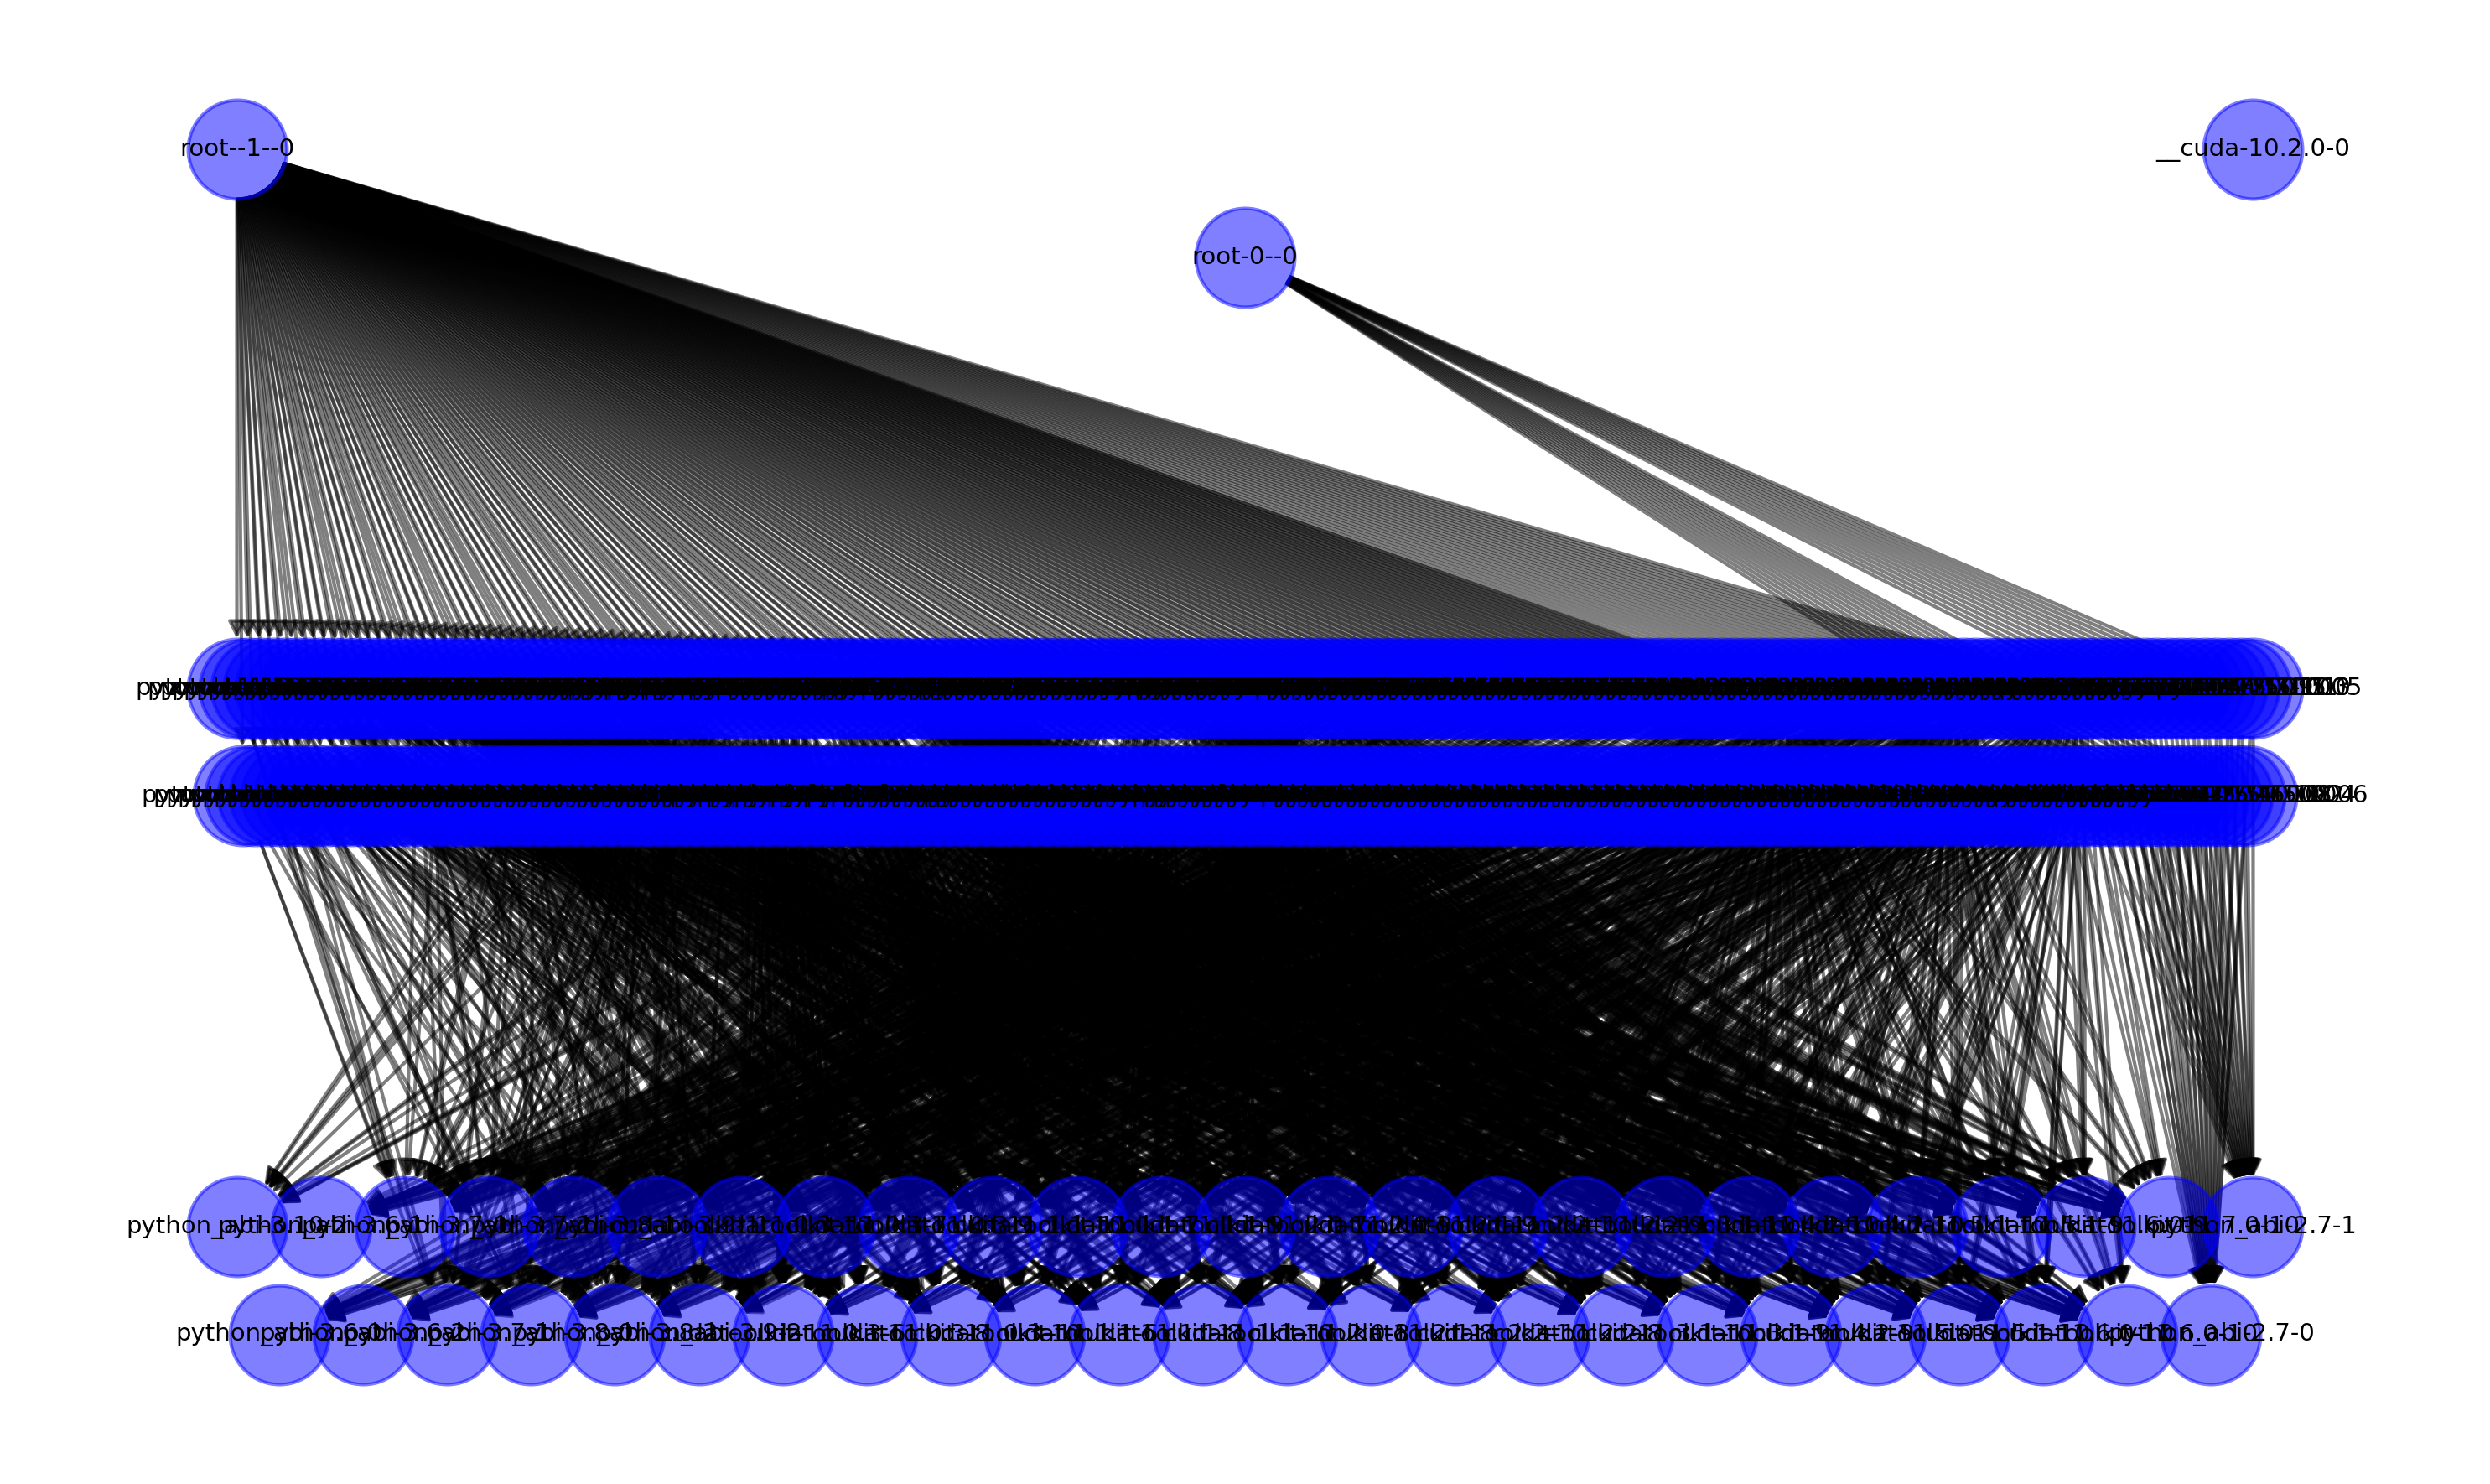

=================================================== Compressed graph ===================================================


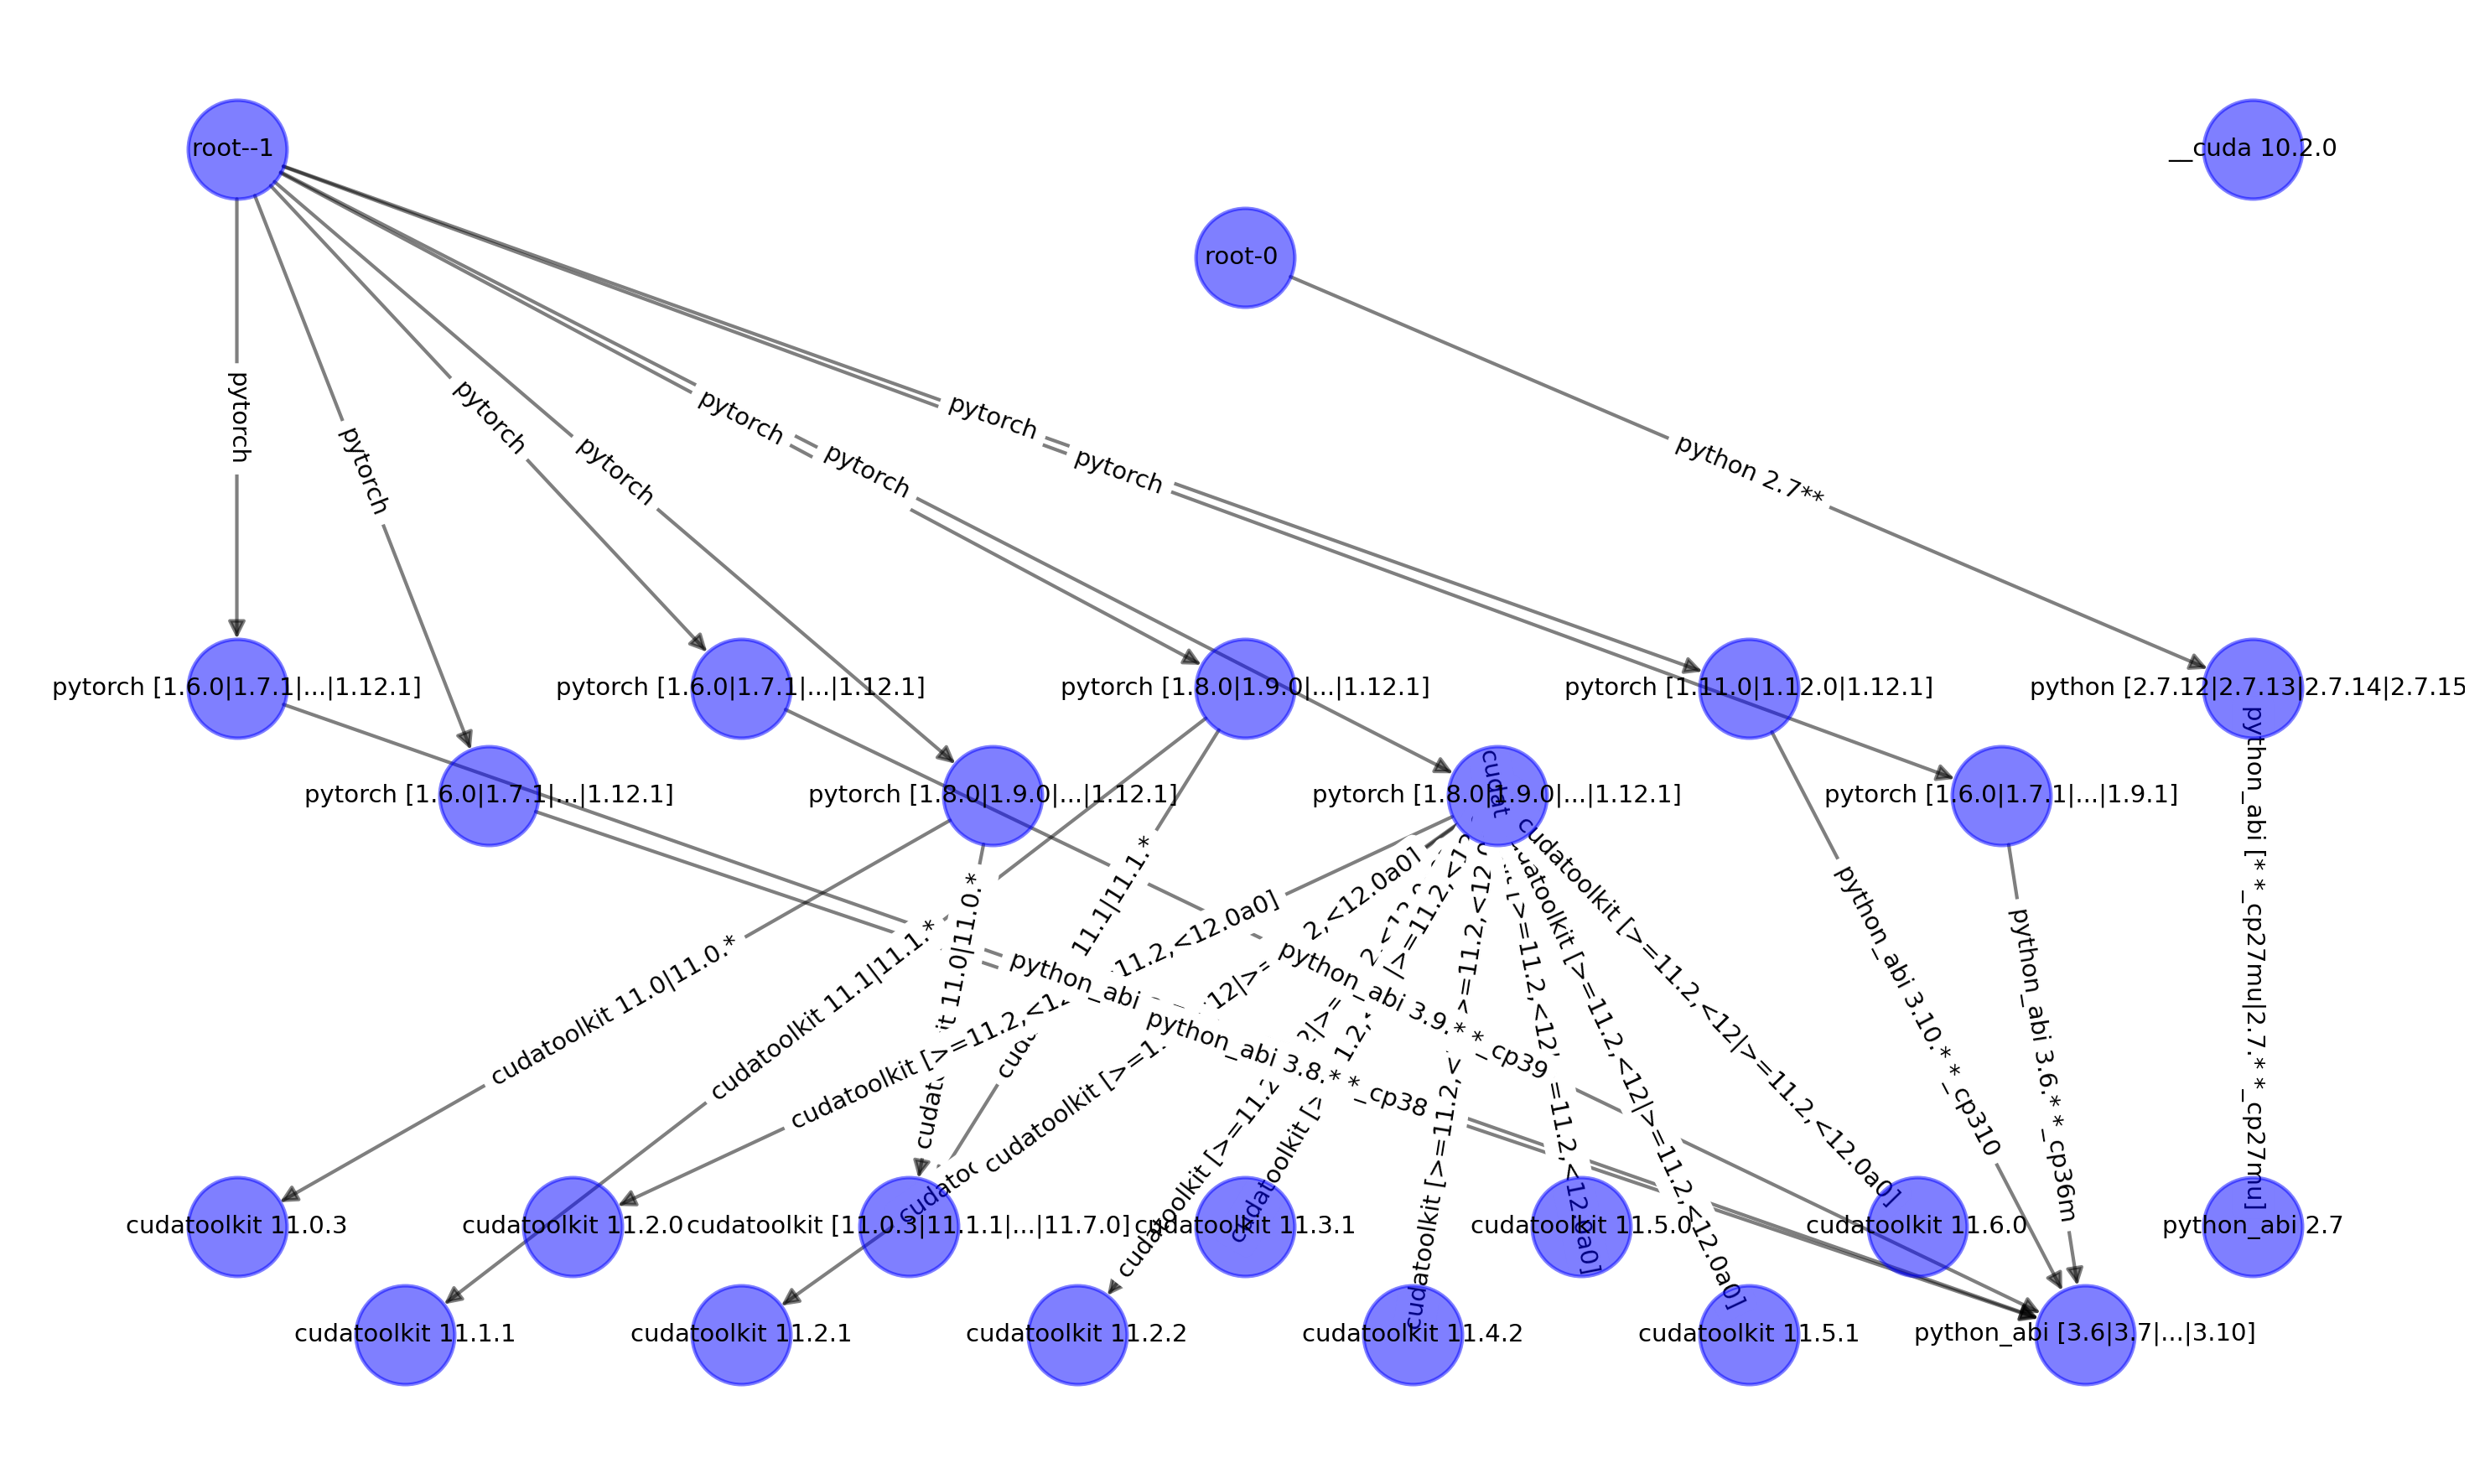

In [4]:
print("{:=^120}".format(" Original graph "))
pb_data = mer.algorithm.ProblemData.from_libsolv(solver, pool)
mer.plot.plot_solvable_dag(pb_data)
print("{:=^120}".format(" Compressed graph "))
cp_data = mer.algorithm.compress_graph(pb_data)
mer.plot.plot_group_dag(pb_data, cp_data)

## Error message

In [5]:
print(mer.algorithm.explain_graph(pb_data, cp_data))

Error: Could not find any installable versions for requested package python 2.7**.

The following requirements limit the allowed versions of downstream packages:
  pytorch is requested, with the potential options
    pytorch [1.6.0|1.7.1|...|1.9.1], which requires
      python_abi 3.6.* *_cp36m, which can be installed;
    pytorch [1.11.0|1.12.0|1.12.1], which requires
      python_abi 3.10.* *_cp310, which can be installed;
    pytorch [1.8.0|1.9.0|...|1.12.1], which requires
      cudatoolkit [>=11.2,<12|>=11.2,<12.0a0] with the potential options
        cudatoolkit 11.6.0, which requires the missing package __cuda >=11.6.0;
        cudatoolkit 11.5.1, which requires the missing package __cuda >=11.5.1;
        cudatoolkit 11.5.0, which requires the missing package __cuda >=11.5.0;
        cudatoolkit 11.4.2, which requires the missing package __cuda >=11.4.2;
        cudatoolkit 11.3.1, which requires the missing package __cuda >=11.3.1;
        cudatoolkit 11.2.2, which requires th